# Linear Regression From Scratch.

This is a notebook which will implement the linear regression model from scratch to predict the salary of a person given his\her years of experience. the linear regression model uses batch gradient descent to optimize the loss of the predictions and mean squared error as the loss function.

In [1]:
from linear_regression import Linear_Regressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The dataset we are going to work with has two columns the years of expirence and the salaries. 

In [2]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Seperating the Independent variable x from the dependent variable y, in our case <b>Years of Experience</b> is the independent variable while the <b>Salary</b> is the dependent variable because it is what we want to predict.
We will also make them numpy arrays for the machine learning model to work with.

In [3]:
X = np.array(dataset.iloc[:,0])
y = np.array(dataset.iloc[:,1])
print(X[:5],y[:5])

[1.1 1.3 1.5 2.  2.2] [39343. 46205. 37731. 43525. 39891.]


## Spliting the Data !

The next step is to split the data to training and testing data for the machine learning model to train and predict. 

In [4]:
def split_data(X,y,ratio=0.25):
    assert len(X) == len(y)
    n = len(X)
    index = int(n * (1 - ratio))
    X_train = X[:index]
    y_train = y[:index]
    X_test = X[index:]
    y_test = y[index:]
    
    return X_train,y_train,X_test,y_test

In [5]:
X_train, y_train, X_test, y_test = split_data(X,y,0.30)

To train the model we use the linear regression model imported earlier in the note and the the training dataset.

In [6]:
model = Linear_Regressor()

In [29]:
model.train(X_train,y_train,epochs=18000,alpha=0.00001,verbose=0)

In [30]:
y_pred = model.predict(X_test)

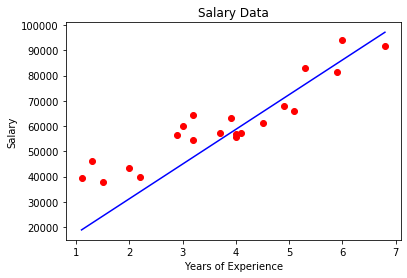

In [31]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Data")
plt.show()

## Using $R^2$ as the metric for accuracy measurement.

In [32]:
def r_squared(y_true,y_pred):
    y_avg = np.sum(y_true) / len(y_true)
    res_error = np.sum((y_true - y_pred)**2)
    total_error  = np.sum((y_true - y_avg)**2)
    
    result = 1 - res_error / total_error
    return result

In [33]:
loss = r_squared(y_train,model.predict(X_train))
print(loss)

0.5309903532013471
